# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
MAX_CITIES = None    # change to None for all data
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:MAX_CITIES]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}?appid={weather_api_key}&q={city.replace(' ', '+')}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date,
                         })

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | al burayqah
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | toliara
Processing Record 10 of Set 1 | hobbs
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | bikenibeu village
Processing Record 14 of Set 1 | hovd
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | urangan
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | macapa
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | cau

Processing Record 35 of Set 4 | nemuro
Processing Record 36 of Set 4 | kiffa
Processing Record 37 of Set 4 | tolanaro
Processing Record 38 of Set 4 | palora
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | karratha
Processing Record 41 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 42 of Set 4 | bamboo flat
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | irymple
Processing Record 45 of Set 4 | whitehorse
Processing Record 46 of Set 4 | qamdo
Processing Record 47 of Set 4 | menongue
Processing Record 48 of Set 4 | nanao
Processing Record 49 of Set 4 | stornoway
Processing Record 0 of Set 5 | roses
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | brentwood estates
Processing Record 3 of Set 5 | rikaze
Processing Record 4 of Set 5 | belo sur tsiribihina
Processing Record 5 of Set 5 | itamaraju
Processing Record 6 of Set 5 | chandbali
Processing Record 7 of Set 5 | hammerfest
Processing R

Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | najran
Processing Record 29 of Set 8 | sona
Processing Record 30 of Set 8 | soe
Processing Record 31 of Set 8 | dryden
Processing Record 32 of Set 8 | bodaybo
Processing Record 33 of Set 8 | pemangkat
Processing Record 34 of Set 8 | smara
Processing Record 35 of Set 8 | turpan
Processing Record 36 of Set 8 | fort st. john
Processing Record 37 of Set 8 | kailua-kona
Processing Record 38 of Set 8 | rabigh
Processing Record 39 of Set 8 | port-vila
Processing Record 40 of Set 8 | fort mcmurray
Processing Record 41 of Set 8 | labytnangi
Processing Record 42 of Set 8 | launceston
Processing Record 43 of Set 8 | qalat
Processing Record 44 of Set 8 | paka
Processing Record 45 of Set 8 | lata
Processing Record 46 of Set 8 | galliano
Processing Record 47 of Set 8 | yaren
Processing Record 48 of Set 8 | zag
Processing Record 49 of Set 8 | tabas
Processing Record 0 of Set 9 | wuchuan
Processing Record 1 of Set 9 | s

Processing Record 19 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 20 of Set 12 | taghazout
Processing Record 21 of Set 12 | zhezqazghan
Processing Record 22 of Set 12 | kalymnos
Processing Record 23 of Set 12 | malango
Processing Record 24 of Set 12 | witu
Processing Record 25 of Set 12 | aoulef
Processing Record 26 of Set 12 | nepalgunj
Processing Record 27 of Set 12 | scituate
Processing Record 28 of Set 12 | kalevala
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | alto barinas
Processing Record 31 of Set 12 | cabezon de la sal
Processing Record 32 of Set 12 | tarakan
Processing Record 33 of Set 12 | klaksvik
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
city_data_df = pd.DataFrame(city_data)
city_data_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       puerto natales -51.7236  -72.4875     49.98        98          99   
1          al burayqah  30.4062   19.5739     64.45        75           1   
2            grytviken -54.2811  -36.5092     36.43        88          66   
3               broome  42.2506  -75.8330     60.71        59          75   
4                 mana   5.6592  -53.7767     77.29        89         100   
..                 ...      ...       ...       ...       ...         ...   
552          kavaratti  10.5669   72.6420     83.03        71          94   
553       alto barinas   8.5931  -70.2261     93.27        43          99   
554  cabezon de la sal  43.3089   -4.2302     59.83        69          52   
555            tarakan   3.3000  117.6333     78.30        94          40   
556           klaksvik  62.2266   -6.5890     45.52        90         100   

     Wind Speed Country        Date  
0          3.13      CL  1683323768  
1         17.52      LY  1683323768  
2         12.12      GS  1683323768  
3         11.99      US  1683323768  
4         10.80      GF  1683323769  
..          ...     ...         ...  
552        7.23      IN  1683323898  
553        4.09      VE  1683323899  
554        2.82      ES  1683323899  
555        8.05      ID  1683323899  
556       25.59      FO  1683323899  

[557 rows x 9 columns]

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
0  puerto natales -51.7236 -72.4875     49.98        98          99   
1     al burayqah  30.4062  19.5739     64.45        75           1   
2       grytviken -54.2811 -36.5092     36.43        88          66   
3          broome  42.2506 -75.8330     60.71        59          75   
4            mana   5.6592 -53.7767     77.29        89         100   

   Wind Speed Country        Date  
0        3.13      CL  1683323768  
1       17.52      LY  1683323768  
2       12.12      GS  1683323768  
3       11.99      US  1683323768  
4       10.80      GF  1683323769

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0        puerto natales -51.7236 -72.4875     49.98        98          99   
1           al burayqah  30.4062  19.5739     64.45        75           1   
2             grytviken -54.2811 -36.5092     36.43        88          66   
3                broome  42.2506 -75.8330     60.71        59          75   
4                  mana   5.6592 -53.7767     77.29        89         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.13      CL  1683323768  
1             17.52      LY  1683323768  
2             12.12      GS  1683323768  
3             11.99      US  1683323768  
4             10.80      GF  1683323769

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

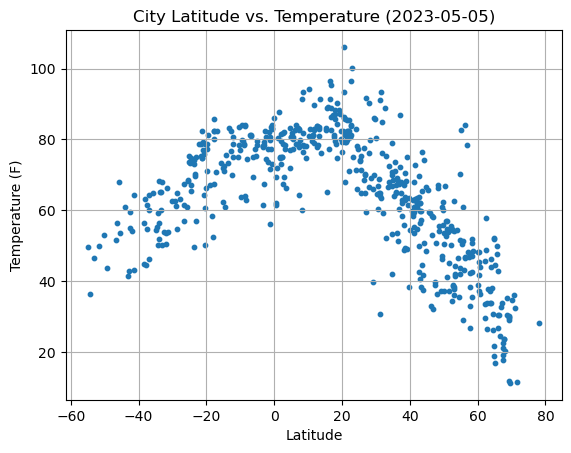

In [10]:
# Build scatter plot for latitude vs. temperature
lat_v_temp = city_data_df.plot.scatter(x='Lat', y='Max Temp', s=10, colormap='viridis',grid=True)
# Incorporate the other graph properties
lat_v_temp.set_xlabel('Latitude')
lat_v_temp.set_ylabel('Temperature (F)')
lat_v_temp.set_title('City Latitude vs. Temperature (2023-05-05)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

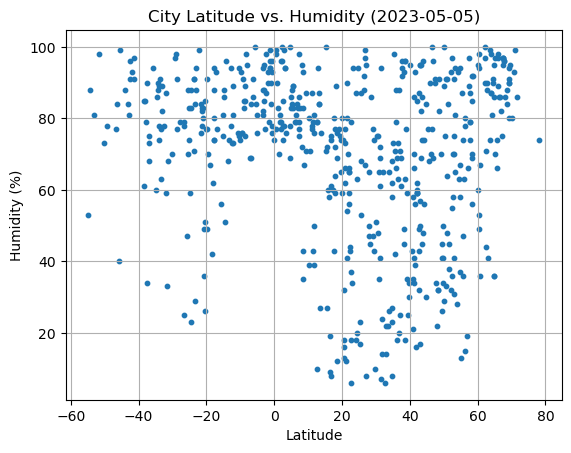

In [11]:
# Build the scatter plots for latitude vs. humidity
lat_v_humidity = city_data_df.plot.scatter(x='Lat', y='Humidity', s=10, colormap='viridis', grid=True)

# Incorporate the other graph properties
lat_v_humidity.set_xlabel('Latitude')
lat_v_humidity.set_ylabel('Humidity (%)')
lat_v_humidity.set_title('City Latitude vs. Humidity (2023-05-05)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

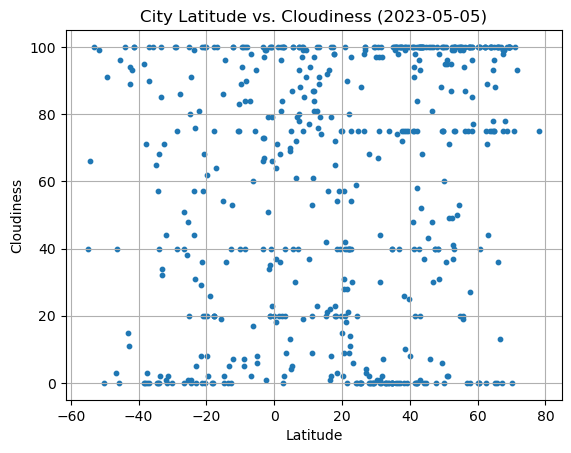

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat_v_cloudiness = city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=10, colormap='viridis', grid=True)


# Incorporate the other graph properties
lat_v_cloudiness.set_xlabel('Latitude')
lat_v_cloudiness.set_ylabel('Cloudiness')
lat_v_cloudiness.set_title('City Latitude vs. Cloudiness (2023-05-05)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

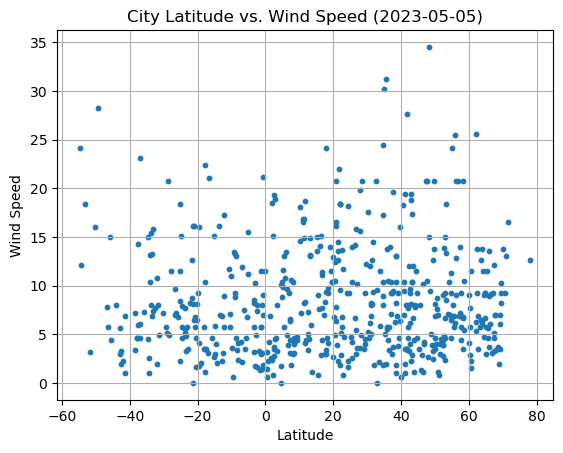

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat_v_wind_speed = city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=10, colormap='viridis', grid=True)

# Incorporate the other graph properties
lat_v_wind_speed.set_xlabel('Latitude')
lat_v_wind_speed.set_ylabel('Wind Speed')
lat_v_wind_speed.set_title('City Latitude vs. Wind Speed (2023-05-05)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
#y = (m*x) + b

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_match = city_data_df['Lat']>=0
northern_hemi_df = city_data_df.loc[northern_hemi_match][['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed','Country','Date']].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        al burayqah  30.4062   19.5739     64.45        75           1   
1             broome  42.2506  -75.8330     60.71        59          75   
2               mana   5.6592  -53.7767     77.29        89         100   
3              hobbs  32.7026 -103.1360     88.81         6           0   
4  bikenibeu village   1.3673  173.1241     87.76        70          20   

   Wind Speed Country        Date  
0       17.52      LY  1683323768  
1       11.99      US  1683323768  
2       10.80      GF  1683323769  
3       20.71      US  1683323770  
4        6.91      KI  1683323585

In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_match = city_data_df['Lat']<0
southern_hemi_df = city_data_df.loc[southern_hemi_match][['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed','Country','Date']].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
0     puerto natales -51.7236 -72.4875     49.98        98          99   
1          grytviken -54.2811 -36.5092     36.43        88          66   
2  port-aux-francais -49.3500  70.2167     43.81        78          91   
3           luderitz -26.6481  15.1594     56.84        79          51   
4            toliara -23.3500  43.6667     69.60        84          31   

   Wind Speed Country        Date  
0        3.13      CL  1683323768  
1       12.12      GS  1683323768  
2       28.27      TF  1683323561  
3        9.64     NaN  1683323769  
4        4.81      MG  1683323769

###  Temperature vs. Latitude Linear Regression Plot

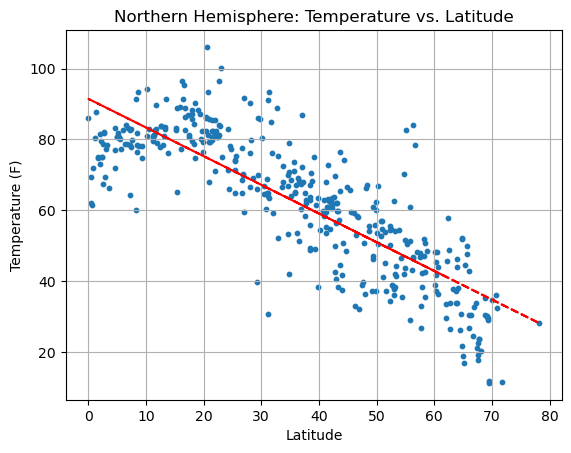

In [17]:
# Linear regression on Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
temperature_northern = northern_hemi_df['Max Temp']

northern_temp_slope, northern_temp_int, northern_temp_r, northern_temp_p, northern_temp_std_err, = linregress(latitude_northern, temperature_northern)
northern_temp_fit = (northern_temp_slope*latitude_northern) + northern_temp_int

northern_temp_scatter_plot = northern_hemi_df.plot.scatter('Lat', 'Max Temp', s=10, grid=True, colormap='viridis')
northern_temp_scatter_plot.set_ylabel('Temperature (F)')
northern_temp_scatter_plot.set_xlabel('Latitude')
northern_temp_scatter_plot.set_title('Northern Hemisphere: Temperature vs. Latitude')
plt.plot(latitude_northern, northern_temp_fit, '--', color='r')

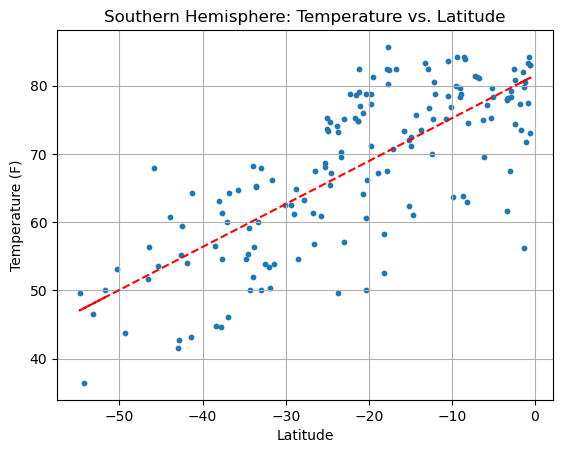

In [18]:
# Linear regression on Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
temperature_southern = southern_hemi_df['Max Temp']

southern_temp_slope, southern_temp_int, southern_temp_r, southern_temp_p, southern_temp_std_err, = linregress(latitude_southern, temperature_southern)
southern_temp_fit = (southern_temp_slope*latitude_southern) + southern_temp_int

southern_temp_scatter_plot = southern_hemi_df.plot.scatter('Lat', 'Max Temp', s=10, grid=True, colormap='viridis')
southern_temp_scatter_plot.set_ylabel('Temperature (F)')
southern_temp_scatter_plot.set_xlabel('Latitude')
southern_temp_scatter_plot.set_title('Southern Hemisphere: Temperature vs. Latitude')
plt.plot(latitude_southern, southern_temp_fit, '--', color='r')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

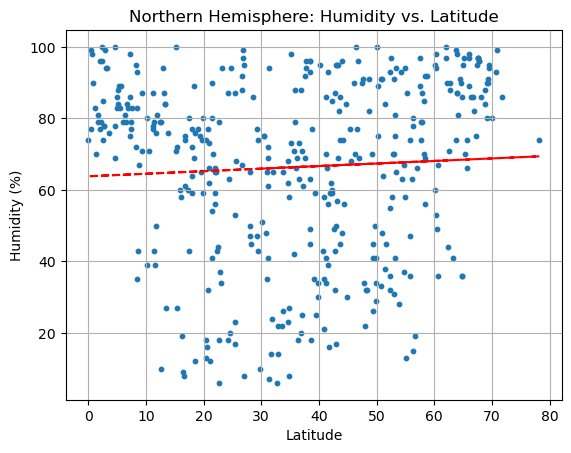

In [19]:
# Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
humidity_northern = northern_hemi_df['Humidity']

northern_humidity_slope, northern_humidity_int, northern_humidity_r, northern_humidity_p, northern_humidity_std_err, = linregress(latitude_northern, humidity_northern)
northern_humidity_fit = (northern_humidity_slope*latitude_northern) + northern_humidity_int

northern_humidity_scatter_plot = northern_hemi_df.plot.scatter('Lat', 'Humidity', s=10, grid=True, colormap='viridis')
northern_humidity_scatter_plot.set_ylabel('Humidity (%)')
northern_humidity_scatter_plot.set_xlabel('Latitude')
northern_humidity_scatter_plot.set_title('Northern Hemisphere: Humidity vs. Latitude')
plt.plot(latitude_northern, northern_humidity_fit, '--', color='r')

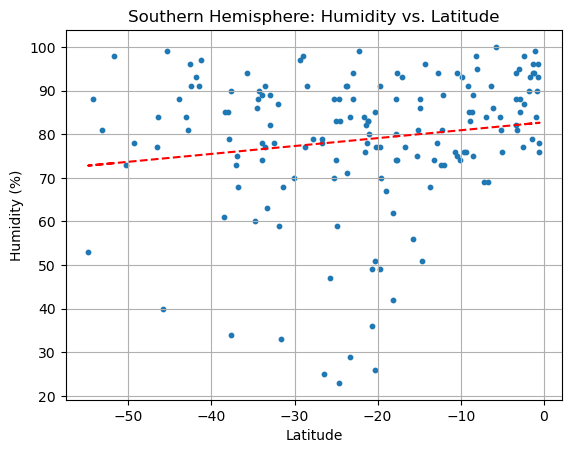

In [20]:
# Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
humidity_southern = southern_hemi_df['Humidity']

southern_humidity_slope, southern_humidity_int, southern_humidity_r, southern_humidity_p, southern_humidity_std_err, = linregress(latitude_southern, humidity_southern)
southern_humidity_fit = (southern_humidity_slope*latitude_southern) + southern_humidity_int

southern_humidity_scatter_plot = southern_hemi_df.plot.scatter('Lat', 'Humidity', s=10, grid=True, colormap='viridis')
southern_humidity_scatter_plot.set_ylabel('Humidity (%)')
southern_humidity_scatter_plot.set_xlabel('Latitude')
southern_humidity_scatter_plot.set_title('Southern Hemisphere: Humidity vs. Latitude')
plt.plot(latitude_southern, southern_humidity_fit, '--', color='r')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

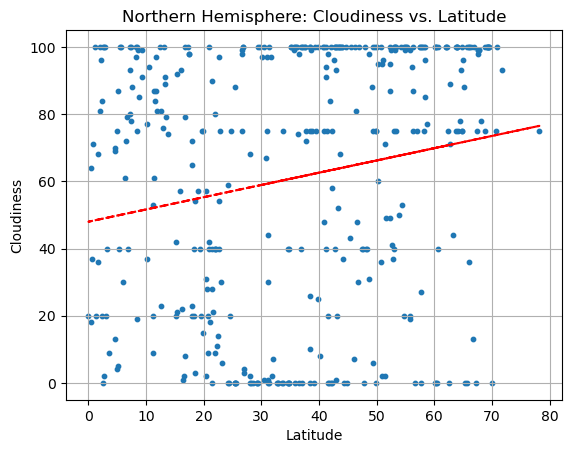

In [21]:
# Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
cloudiness_northern = northern_hemi_df['Cloudiness']

northern_cloudiness_slope, northern_cloudiness_int, northern_cloudiness_r, northern_cloudiness_p, northern_cloudiness_std_err, = linregress(latitude_northern, cloudiness_northern)
northern_cloudiness_fit = (northern_cloudiness_slope*latitude_northern) + northern_cloudiness_int

northern_cloudiness_scatter_plot = northern_hemi_df.plot.scatter('Lat', 'Cloudiness', s=10, grid=True, colormap='viridis')
northern_cloudiness_scatter_plot.set_ylabel('Cloudiness')
northern_cloudiness_scatter_plot.set_xlabel('Latitude')
northern_cloudiness_scatter_plot.set_title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.plot(latitude_northern, northern_cloudiness_fit, '--', color='r')


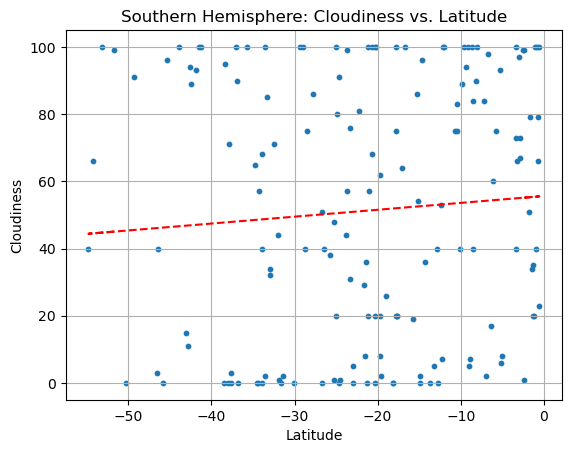

In [22]:
# Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
cloudiness_southern = southern_hemi_df['Cloudiness']

southern_cloudiness_slope, southern_cloudiness_int, southern_cloudiness_r, southern_cloudiness_p, southern_cloudiness_std_err, = linregress(latitude_southern, cloudiness_southern)
southern_cloudiness_fit = (southern_cloudiness_slope*latitude_southern) + southern_cloudiness_int

southern_cloudiness_scatter_plot = southern_hemi_df.plot.scatter('Lat', 'Cloudiness', s=10, grid=True, colormap='viridis')
southern_cloudiness_scatter_plot.set_ylabel('Cloudiness')
southern_cloudiness_scatter_plot.set_xlabel('Latitude')
southern_cloudiness_scatter_plot.set_title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.plot(latitude_southern, southern_cloudiness_fit, '--', color='r')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

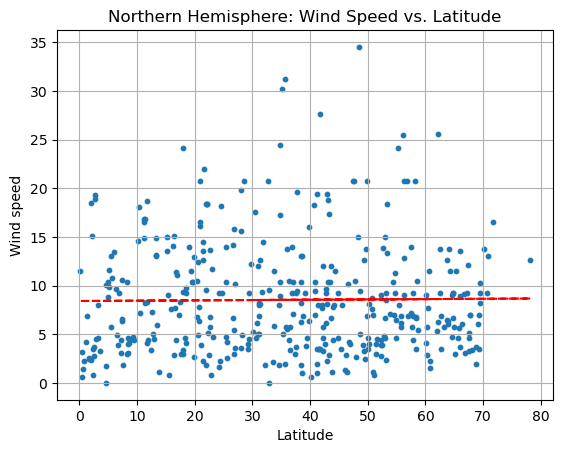

In [23]:
# Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
wind_speed_northern = northern_hemi_df['Wind Speed']

northern_wind_speed_slope, northern_wind_speed_int, northern_wind_speed_r, northern_wind_speed_p, northern_wind_speed_std_err, = linregress(latitude_northern, wind_speed_northern)
northern_wind_speed_fit = (northern_wind_speed_slope*latitude_northern) + northern_wind_speed_int

northern_wind_speed_scatter_plot = northern_hemi_df.plot.scatter('Lat', 'Wind Speed', s=10, grid=True, colormap='viridis')
northern_wind_speed_scatter_plot.set_ylabel('Wind speed')
northern_wind_speed_scatter_plot.set_xlabel('Latitude')
northern_wind_speed_scatter_plot.set_title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.plot(latitude_northern, northern_wind_speed_fit, '--', color='r')


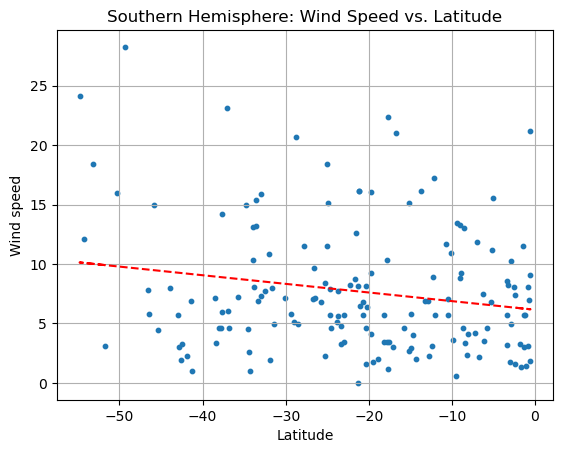

In [24]:
# Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
wind_speed_southern = southern_hemi_df['Wind Speed']

southern_wind_speed_slope, southern_wind_speed_int, southern_wind_speed_r, southern_wind_speed_p, southern_wind_speed_std_err, = linregress(latitude_southern, wind_speed_southern)
southern_wind_speed_fit = (southern_wind_speed_slope*latitude_southern) + southern_wind_speed_int

southern_wind_speed_scatter_plot = southern_hemi_df.plot.scatter('Lat', 'Wind Speed', s=10, grid=True, colormap='viridis')
southern_wind_speed_scatter_plot.set_ylabel('Wind speed')
southern_wind_speed_scatter_plot.set_xlabel('Latitude')
southern_wind_speed_scatter_plot.set_title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.plot(latitude_southern, southern_wind_speed_fit, '--', color='r')


**Discussion about the linear relationship:** YOUR RESPONSE HERE